In [2]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [5]:
np.random.seed(1234)
long_breaks = stats.poisson.rvs(loc=10, mu=60, size=3000)
short_breaks = stats.poisson.rvs(loc=10, mu=15, size=6000)
breaks = np.concatenate((long_breaks, short_breaks))

print(breaks.mean())

np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

print(population_ages.mean())

39.99944444444444
43.002372


In [6]:
employee_races = (["white"]*2000) + (["black"]*1000) +\
                   (["hispanic"]*1000) + (["asian"]*3000) +\
                   (["other"]*3000)

        
demo_sample = random.sample(employee_races, 1000)   # Sample 1000 values

for race in set(demo_sample):
    print( race + " proportion estimate:" )
    print( demo_sample.count(race)/1000. )

white proportion estimate:
0.194
black proportion estimate:
0.091
asian proportion estimate:
0.286
other proportion estimate:
0.332
hispanic proportion estimate:
0.097


In [7]:
sample_breaks = np.random.choice(a= breaks,size=100)            # Sample 100 values

sample_ages = np.random.choice(a= population_ages,
                               size=1000)            # Sample 1000 values
                               
sample_ages.mean()-sample_breaks.mean()    # Check difference between means

4.2180000000000035

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

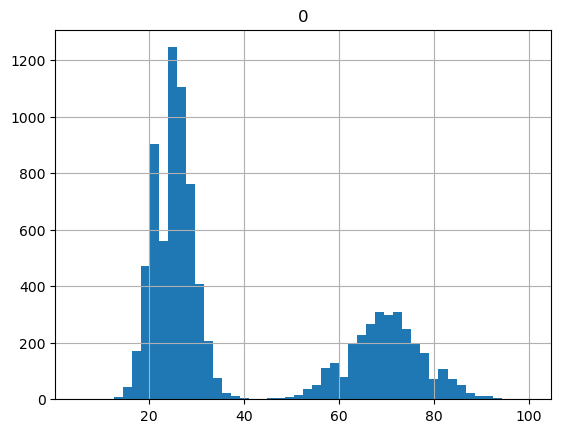

In [8]:
pd.DataFrame(breaks).hist(bins=50,range=(5,100))

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

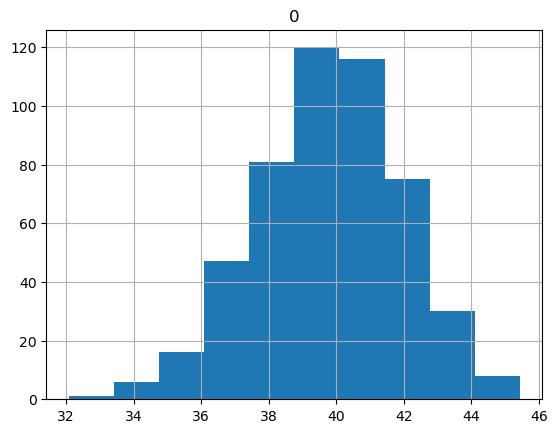

In [9]:
point_estimates = []
for x in range(500):         # Generate 500 samples
    sample = np.random.choice(a= breaks, size=100) #take a sample of 100 points
    point_estimates.append( sample.mean() )
    
pd.DataFrame(point_estimates).hist()

In [10]:
breaks.mean() - np.array(point_estimates).mean()

0.19044444444444508

In [11]:
sample_size = 100
sample = np.random.choice(a= breaks, size = sample_size)

sample_mean = sample.mean()
# sample mean

sample_stdev = sample.std()    
# sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  
# population Standard deviation estimate

stats.t.interval(alpha = 0.95,              # Confidence level
                 df= sample_size - 1,       # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate


(33.29062007924207, 41.38937992075794)

In [12]:
def makeConfidenceInterval():
    sample_size = 100
    sample = np.random.choice(a= breaks, size = sample_size)

    sample_mean = sample.mean()
    # sample mean

    sample_stdev = sample.std()    
    # sample standard deviation

    sigma = sample_stdev/math.sqrt(sample_size)  
    # population Standard deviation estimate

    return stats.t.interval(alpha = 0.95,              # Confidence level
                     df= sample_size - 1,       # Degrees of freedom
                     loc = sample_mean,         # Sample mean
                     scale = sigma)             # Standard deviation estimate


In [13]:
times_in_interval = 0.
for i in range(10000):
    interval = makeConfidenceInterval()
    if 39.99 >= interval[0] and 39.99 <= interval[1]:
    # if 39.99 falls in the interval
        times_in_interval += 1

print(times_in_interval / 10000)

0.9488


In [14]:
long_breaks_in_engineering = stats.poisson.rvs(loc=10, mu=55, size=100)
short_breaks_in_engineering = stats.poisson.rvs(loc=10, mu=15, size=300)
engineering_breaks = np.concatenate((long_breaks_in_engineering, short_breaks_in_engineering))

print(breaks.mean())
print(engineering_breaks.mean())

39.99944444444444
34.835


In [15]:
t_statistic, p_value = stats.ttest_1samp(a= engineering_breaks,               # Sample data
                 popmean= breaks.mean())  # Population mean

In [16]:
t_statistic, p_value

(-5.747501846232637, 1.801152054108952e-08)

In [17]:
observed = [102, 178, 186, 34]
expected = [156, 165.5, 147, 31.5]

In [18]:
chi_squared, p_value = stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts
chi_squared, p_value

(30.1817679275599, 1.26374310311106e-06)

In [19]:
observed = np.array([[134, 54],[110, 48]])
chi_squared, p_value, degrees_of_freedom, matrix = stats.chi2_contingency(observed= observed)
chi_squared, p_value

(0.04762692369491045, 0.8272452870442226)